# Lecture 3 - Probability Distributions

## Objectives
+ Learn about some famous discrete PDFs
+ Learn about some famous continous PDFs

## Discrete random variables

### Coin flipping: Heads = 1, Tails = 0 - The Bernulli Distribution

Let $X$ be the following random variable:
$$
X = \begin{cases}
1,& \mbox{with probability}\;\theta,\\
0,& \mbox{with probability}\;1-\theta,
\end{cases}
$$
where $\theta\in[0,1]$ is the probability of getting heads (i.e., 1).
The PDF of this random variable has two values:
$$
p(X=1|\theta) = \theta,
$$
and
$$
p(X=0|\theta) = 1-\theta.
$$

The expected value is:
$$
\mathbb{E}[X|\theta] = \sum_x xp(X=x|\theta) = 1\times p(X=1|\theta) + 0\times p(X=0|\theta) = \theta.
$$

The "coin flipping" random variable is also known as a Bernulli random
variable (or Bernulli trial).
Typically, we write:
$$
X=x|\theta \sim \mbox{Bern}(X=x|\theta) = \theta^{x}(1-\theta)^{1-x}.
$$

Let's play with this random variable using [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html),
and specifically [scipy.stats.bernulli](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli).

In [21]:
# Initialize the random variable
import scipy.stats as st
X = st.bernoulli(0.25)
# Take 10 samples:
X.rvs(20)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [22]:
# You can also compute the mean of a random variable:
X.mean()

0.25

In [23]:
# The variance
X.var()

0.1875

In [24]:
# You can evaluate the PDF anywhere you want
# (called probability mass function):
X.pmf(0.5)

0.0

In [25]:
X.pmf(0.)

0.75

In [26]:
X.pmf(1.)

0.25

### N Coin Flips - The Binomial Distribution

Consider an experiment with two possible outcomes: 1 and 0 (success and faillure).
Let $\theta$ be the probability of success.
Now assume that you perform the experiment $N$ times.
Let $X$ the random variable that counts the succesfull experiments.
We say that $X$ is a Binomial random variable. Using counting arguments, one can show that the PDF of $X$ is:
$$
p(X=k|N,\theta) = \mbox{Bin}(X=k|N,\theta) = \left(\frac{N}{k}\right)\theta^k(1-\theta)^{N-k}.
$$
We can also show that the mean is
$$
\mathbb{E}[X|N,\theta] = N\theta,
$$
and that the variance is 
$$
\mathbb{V}[X|N,\theta] = N\theta(1-\theta).
$$

We can play with this using [scipy.stats.binom](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom):

In [31]:
X = st.binom(10, 0.25) # N, theta
# Take samples.
X.rvs(10)

array([4, 3, 5, 3, 1, 0, 4, 3, 1, 3])

In [34]:
# Get some statistics
mean, var, skew, kurt = X.stats(moments='mvsk')
print mean
print var
print skew
print kurt

2.5
1.875
0.36514837167
-0.0666666666667


Let's use the binomial we have just constructed to demonstrated yet another attribute of random variables, the **percent point function**.
The percent point function, is actually the inverse of the CDF.
For example:

In [37]:
X.ppf(0.01)

0.0

which means that with probability $0.01$, $X$, is less than 0, or

In [38]:
X.ppf(0.99)

6.0

which means that with probability 0.99, $X$, is less than 6, or

In [39]:
X.ppf(0.5)

2.0

which means that with probability 0.5, $X$, is less than 2.

Now, let's actually visualize the Binomial distribution:

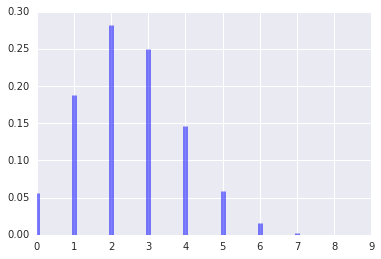

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from ipywidgets import interactive
def visualize_binomial(N=10, theta=0.25):
    X = st.binom(N, theta)
    x = np.arange(0, N)
    plt.vlines(x, 0, X.pmf(x), color='b', alpha=0.5, lw=5)
interactive(visualize_binomial, N=(1, 100, 1), theta=(0, 1., 0.01))

### Other Important Discrete Random Variables
+ [Poisson random variable](https://en.wikipedia.org/wiki/Poisson_distribution) (see also
[scipy.stats.poisson](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)), which is used to describe the number of events occuring in a fixed time interval.

## Continuous Random Variables

### Uniform distribution 

The uniform distribution over an interval $[a, b]$ can be used to describe our state of knowledge about random variable known to be within this interval, if nothing else is known about them.
We say that $X$ is a uniform random variable on the interval $[a, b]$,
and write:
$$
x|a,b \sim U(x|a,b) = 
\begin{cases}
\frac{1}{b - a},&\mbox{if}\;x\in[a,b],\\
0,&\mbox{otherwise}.
\end{cases}
$$

You can play with it using [scipy.stats](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform):

In [60]:
X = st.uniform(0, 1)
X.rvs(10)

array([ 0.5334961 ,  0.16581931,  0.78658391,  0.85022527,  0.10600555,
        0.76270302,  0.43222264,  0.9725804 ,  0.937761  ,  0.16955123])

Let's take a large sample and draw the histogram:

(array([ 1.12835309,  0.8563394 ,  0.93693605,  0.93693605,  1.10820393,
         1.09812935,  1.12835309,  0.84626482,  1.09812935,  0.93693605]),
 array([  5.81261786e-04,   9.98409715e-02,   1.99100681e-01,
          2.98360391e-01,   3.97620101e-01,   4.96879810e-01,
          5.96139520e-01,   6.95399230e-01,   7.94658939e-01,
          8.93918649e-01,   9.93178359e-01]),
 <a list of 1 Patch objects>)

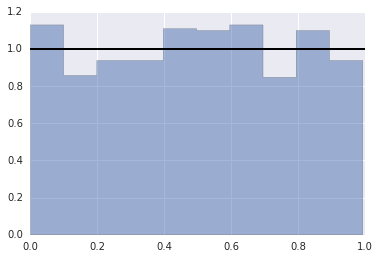

In [67]:
x = np.linspace(0, 1, 100)
plt.plot(x, X.pdf(x), 'k-', lw=2)
plt.hist(X.rvs(1000), normed=True, histtype='stepfilled', alpha=0.5)

### The Beta Distribution

The Beta distribution is suitable for parameters that take values in $[0,1]$, but not necessarily in a uniform manner. 
The $\theta$ describing the probability of success in a Bernulli trial was such a parameter. Our state of knowledge about it, can thus be represented using a Beta distribution.
The definition of the Beta distribution is conditional on two parameters
$a, b > 0$ that control its shape:
$$
\theta|a,b \sim \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1},
$$
where $\Gamma(\cdot)$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function).

In [69]:
X = st.beta(0.5, 0.9)
X.rvs(10)

array([ 0.00603264,  0.5214056 ,  0.09743458,  0.73979585,  0.06855319,
        0.70332611,  0.01049383,  0.89903704,  0.67018866,  0.01144496])

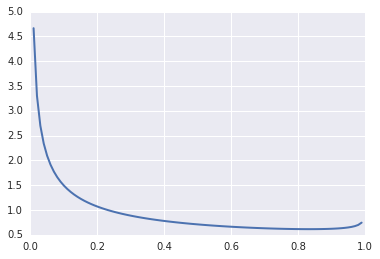

In [73]:
def visualize_beta(a=0.5, b=0.9):
    X = st.beta(a, b)
    x = np.linspace(0, 1, 100)
    plt.plot(x, X.pdf(x), lw=2)
interactive(visualize_beta, a=(0.001, 100., 0.1), b=(0.001, 100., 0.1))

### Questions
Let's say that you wish to analyze a coin flipping experiment and you do not know what the probability of getting heads, $\theta$, is. Therefore, you have to model $\theta$ as a random variable and assign a probability density to it. Since $\theta$ takes values between 0 and 1, you decide to assign a Beta distribution to it. Using the interactive tool above, try to find parameters $a$ and $b$ that describe the following states of knowledge:
+ The coin is fair.
+ The coin is slightly biased towards heads.
+ The coin is slightly biased towards tails.
+ The coin is definitely biased towards heads.
+ The coin is definitely biased towards tails.
+ The coin is definitely biased, but I don't know how.

### Exponential Random Variable

The [Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is suitable for random variables that describe the time between events in a process in which events occure continuously and at a constant rate. In general, it can be used for random variables that are positive as a special case of the [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution).
We write:
$$
x|r\sim \mathcal{E}(x|r) = r e^{-r x},
$$
where $r>0$ is known as the *rate parameter*.

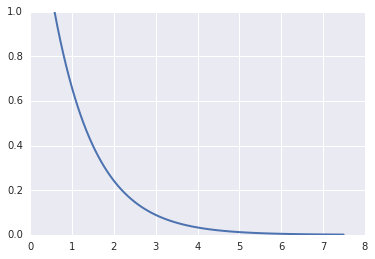

In [110]:
def visualize_exponential(r=0.5):
    X = st.expon(r)
    x = np.linspace(X.ppf(0.001), X.ppf(0.999), 100)
    plt.plot(x, X.pdf(x), lw=2)
interactive(visualize_exponential, r=(0.001, 10, 0.01))

### The Gaussian (Normal) Distribution

The Gaussian distribution is suitable for continuous random variables with known mean, $\mu$, and variance, $\sigma^2$, with no other restrictions posed on them.
We write:
$$
x|\mu, \sigma\sim \mathcal{N}(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

Of course:
$$
\mathbb{E}[X|\mu,\sigma] = \mu,
$$
and
$$
\mathbb{V}[X|\mu,\sigma] = \sigma^2.
$$

In [74]:
X = st.norm(loc=0.5, scale=2.)

In [75]:
print X.rvs(10)

[-1.40480312  0.32419139  3.67686951 -1.15332344  3.35935014  1.3678408
 -3.91793104 -0.37546934  2.39550956 -0.15666293]


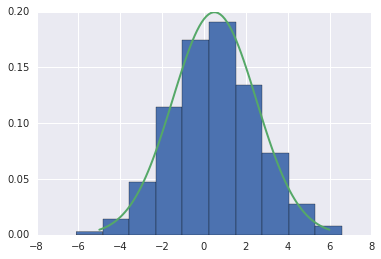

In [79]:
plt.hist(X.rvs(2000), normed=True)
x = np.linspace(-5, 6, 100)
plt.plot(x, X.pdf(x), lw=2)

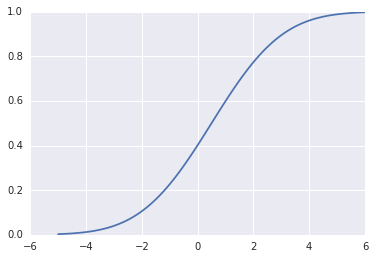

In [80]:
# The CDF of the Gaussian
plt.plot(x, X.cdf(x))

### The Central Limit Theorem

The sum of $N$ independent and indentically distributed (iid) random variables starts to look like a Gaussian for large $N$.
Mathematically, let $X_1,X_2,\dots$ be iid random variables with mean $\mu$ and variance $\sigma^2$ and define the running average of the random variables:
$$
S_N = \frac{X_1+\dots+X_N}{N}.
$$
The Central Limit Theorem (CLT), states that:
$$
S_N \sim \mathcal{N}(S_N|\mu, \frac{\sigma^2}{N}),
$$
for large $N$.
We are not going to prove this, but let us test it numerically:

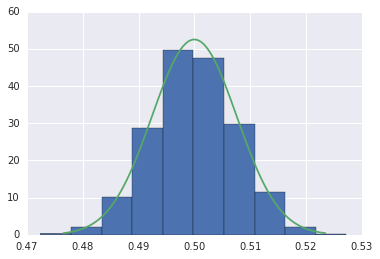

In [100]:
# Testing CLT for iid uniform random variables:
def visualize_uniform_clt(N=2):
    X = st.uniform()
    mu = X.mean()
    sigma = X.std()
    x = X.rvs((N, 10000))
    s = x.mean(axis=0)
    S_N_approx = st.norm(loc=mu, scale=sigma / np.sqrt(N))
    plt.hist(s, normed=True)
    xx = np.linspace(S_N_approx.ppf(0.001), S_N_approx.ppf(0.999), 100)
    plt.plot(xx, S_N_approx.pdf(xx))
interactive(visualize_uniform_clt, N=(1, 10000, 1))

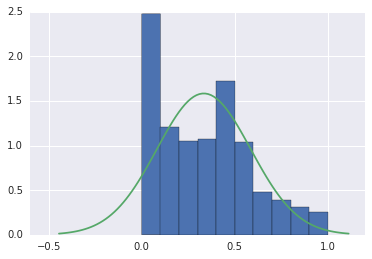

In [102]:
# Testing CLT for iid beta random variables:
def visualize_beta_clt(N=2, a=0.25, b=0.5):
    X = st.beta(a, b)
    mu = X.mean()
    sigma = X.std()
    x = X.rvs((N, 10000))
    s = x.mean(axis=0)
    S_N_approx = st.norm(loc=mu, scale=sigma / np.sqrt(N))
    plt.hist(s, normed=True)
    xx = np.linspace(S_N_approx.ppf(0.001), S_N_approx.ppf(0.999), 100)
    plt.plot(xx, S_N_approx.pdf(xx))
interactive(visualize_beta_clt, N=(1, 10000, 1), a=(0.01, 10, 0.01), b=(0.01, 10, 0.01))

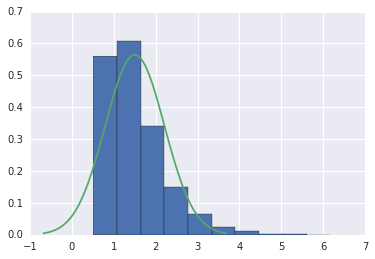

In [105]:
# Testing CLT for iid exponential random variables:
def visualize_exponential_clt(N=2, r=0.5):
    X = st.expon(r)
    mu = X.mean()
    sigma = X.std()
    x = X.rvs((N, 10000))
    s = x.mean(axis=0)
    S_N_approx = st.norm(loc=mu, scale=sigma / np.sqrt(N))
    plt.hist(s, normed=True)
    xx = np.linspace(S_N_approx.ppf(0.001), S_N_approx.ppf(0.999), 100)
    plt.plot(xx, S_N_approx.pdf(xx))
interactive(visualize_exponential_clt, N=(1, 10000, 1), a=(0.01, 10, 0.01), b=(0.01, 10, 0.01))